<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/Prueba_de_Rachas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La serie numérica parece ser aleatoria
Estadístico Z calculado: 0.2559
Límites críticos (±): -1.9600
Nivel de confianza: 95.0%
Número de rachas: 27


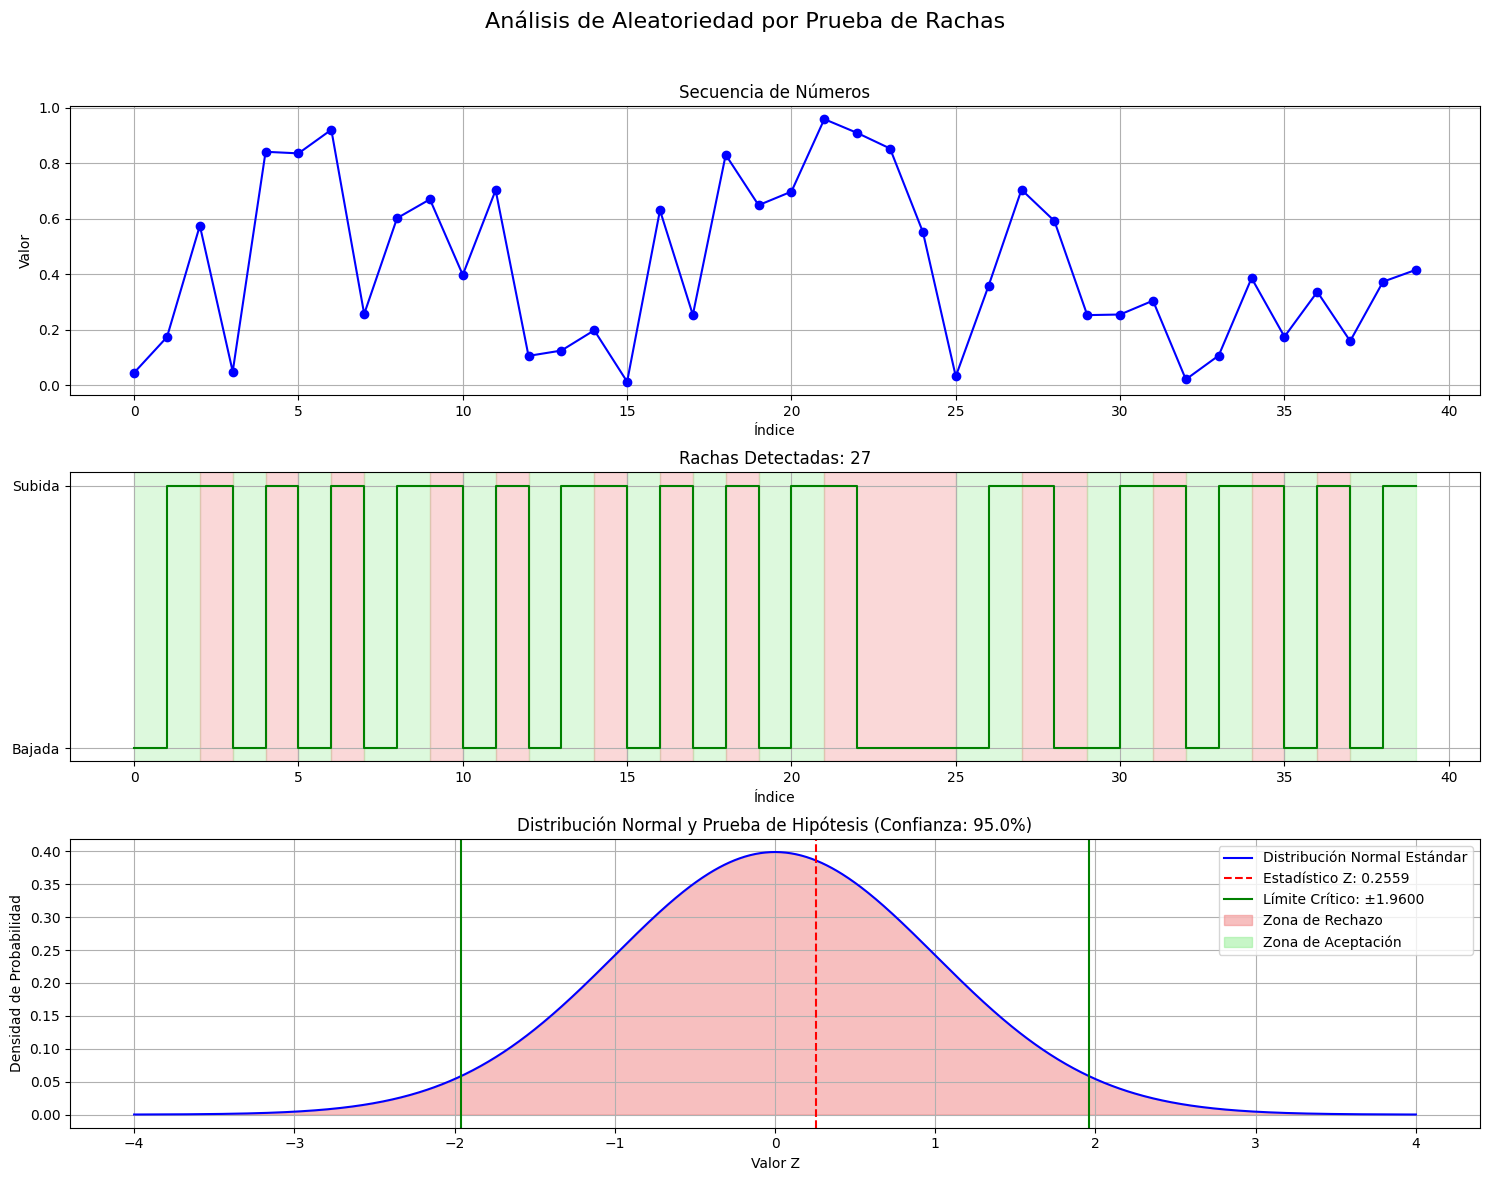

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def crear_patron_comparativo(serie_numerica):
    """
    Genera un patrón binario basado en la relación entre números adyacentes.
    Retorna 'arriba' (True) si el siguiente número es mayor o igual, 'abajo' (False) si es menor.
    """
    patron = []
    for indice in range(1, len(serie_numerica)):
        # Comparamos cada elemento con su predecesor
        if serie_numerica[indice] >= serie_numerica[indice - 1]:
            patron.append(True)  # Tendencia ascendente o igual
        else:
            patron.append(False)  # Tendencia descendente
    return patron

def contar_cambios_direccion(patron):
    """
    Cuenta el número de veces que cambia la dirección en el patrón (de ascendente a descendente o viceversa).
    """
    if not patron:
        return 0

    total_cambios = 1  # Empezamos contando la primera secuencia

    # Identificamos los puntos de cambio para graficar después
    puntos_cambio = [0]  # Empezamos con el primer punto

    for i in range(len(patron) - 1):
        # Detectamos un cambio de dirección
        if patron[i] != patron[i + 1]:
            total_cambios += 1
            puntos_cambio.append(i + 1)

    # Añadimos el último punto
    puntos_cambio.append(len(patron))

    return total_cambios, puntos_cambio

def evaluar_aleatoriedad(serie_numerica, nivel_confianza=0.95):
    """
    Evalúa si una serie de números parece aleatoria usando la prueba de rachas.

    Parámetros:
    - serie_numerica: Lista de números a evaluar
    - nivel_confianza: Nivel de confianza para la prueba (0.95 = 95%)
                       PUEDES MODIFICAR ESTE VALOR AQUÍ

    Retorna:
    - Un mensaje indicando si la serie parece aleatoria o no
    - El valor estadístico calculado
    - Los límites críticos
    """
    # Convertir nivel de confianza a nivel de significancia
    nivel_significancia = 1 - nivel_confianza

    # Obtener el patrón de comparación
    patron = crear_patron_comparativo(serie_numerica)

    # Contar cambios de dirección
    cambios, puntos_cambio = contar_cambios_direccion(patron)

    # Longitud de la serie original
    n = len(serie_numerica)

    # Calcular estadísticas teóricas para la distribución de rachas
    media_esperada = (2 * n - 1) / 3
    varianza_esperada = (16 * n - 29) / 90

    # Calcular el estadístico Z
    z_calculado = (cambios - media_esperada) / np.sqrt(varianza_esperada)

    # Calcular límites críticos basados en el nivel de confianza
    limite_critico = stats.norm.ppf(1 - nivel_significancia / 2)

    # Determinar si la serie es aleatoria
    if -limite_critico <= z_calculado <= limite_critico:
        resultado = "La serie numérica parece ser aleatoria"
    else:
        resultado = "La serie numérica NO parece ser aleatoria"

    return {
        "resultado": resultado,
        "estadistico_z": z_calculado,
        "limites_criticos": (-limite_critico, limite_critico),
        "nivel_confianza": nivel_confianza,
        "numero_rachas": cambios,
        "puntos_cambio": puntos_cambio,
        "patron": patron
    }

def graficar_resultados(serie_numerica, resultados):
    """
    Genera gráficas para visualizar los resultados de la prueba de rachas.

    Parámetros:
    - serie_numerica: Lista de números evaluados
    - resultados: Diccionario con los resultados de la prueba
    """
    # Configuración de la figura
    fig = plt.figure(figsize=(15, 12))
    fig.suptitle('Análisis de Aleatoriedad por Prueba de Rachas', fontsize=16)

    # 1. Gráfica de la secuencia de números
    ax1 = fig.add_subplot(3, 1, 1)
    ax1.plot(range(len(serie_numerica)), serie_numerica, 'o-', color='blue')
    ax1.set_title('Secuencia de Números')
    ax1.set_xlabel('Índice')
    ax1.set_ylabel('Valor')
    ax1.grid(True)

    # 2. Gráfica de rachas detectadas
    ax2 = fig.add_subplot(3, 1, 2)

    # Convertir patrón booleano a 1s y 0s para graficar
    patron_numerico = [1 if p else 0 for p in resultados["patron"]]

    # Añadir el primer valor para que coincida con la longitud original
    patron_completo = [0] + patron_numerico  # Valor arbitrario para el primer punto

    # Graficar tendencia (subida/bajada)
    ax2.step(range(len(patron_completo)), patron_completo, where='post', color='green')
    ax2.set_yticks([0, 1])
    ax2.set_yticklabels(['Bajada', 'Subida'])
    ax2.set_title(f'Rachas Detectadas: {resultados["numero_rachas"]}')
    ax2.set_xlabel('Índice')
    ax2.grid(True)

    # Resaltando las rachas
    puntos_cambio = resultados["puntos_cambio"]
    for i in range(len(puntos_cambio)-1):
        start = puntos_cambio[i]
        end = puntos_cambio[i+1]
        # Alterna colores para las rachas
        color = 'lightgreen' if i % 2 == 0 else 'lightcoral'
        ax2.axvspan(start, end, alpha=0.3, color=color)

    # 3. Gráfica de la distribución normal y el estadístico Z
    ax3 = fig.add_subplot(3, 1, 3)

    # Rango de valores para la distribución normal
    x = np.linspace(-4, 4, 1000)

    # Función de densidad de probabilidad normal
    pdf = stats.norm.pdf(x, 0, 1)

    # Graficar la distribución normal
    ax3.plot(x, pdf, 'b-', label='Distribución Normal Estándar')

    # Marcar el estadístico Z calculado
    z_calculado = resultados["estadistico_z"]
    ax3.axvline(x=z_calculado, color='red', linestyle='--',
                label=f'Estadístico Z: {z_calculado:.4f}')

    # Marcar los límites críticos
    limite = resultados["limites_criticos"][0]
    ax3.axvline(x=limite, color='green', linestyle='-',
                label=f'Límite Crítico: ±{abs(limite):.4f}')
    ax3.axvline(x=-limite, color='green', linestyle='-')

    # Sombrear el área de rechazo
    ax3.fill_between(x, pdf, where=(x <= -limite) | (x >= limite),
                     color='lightcoral', alpha=0.5, label='Zona de Rechazo')
    ax3.fill_between(x, pdf, where=(x >= -limite) & (x <= limite),
                     color='lightgreen', alpha=0.5, label='Zona de Aceptación')

    ax3.set_title(f'Distribución Normal y Prueba de Hipótesis (Confianza: {resultados["nivel_confianza"]*100}%)')
    ax3.set_xlabel('Valor Z')
    ax3.set_ylabel('Densidad de Probabilidad')
    ax3.legend()
    ax3.grid(True)

    # Ajustar espaciado
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Ejemplo de uso con la nueva serie de números
numeros_prueba = [0.0449, 0.1733, 0.5746, 0.049, 0.8406, 0.8349, 0.92, 0.2564, 0.6015,
               0.6694, 0.3972, 0.7025, 0.1055, 0.1247, 0.1977, 0.0125, 0.63, 0.2531,
               0.8297, 0.6483, 0.6972, 0.9582, 0.9085, 0.8524, 0.5514, 0.0316, 0.3587,
               0.7041, 0.5915, 0.2523, 0.2545, 0.3044, 0.0207, 0.1067, 0.3857, 0.1746,
               0.3362, 0.1589, 0.3727, 0.4154]

# Ejecutar la prueba con 95% de confianza
resultado = evaluar_aleatoriedad(numeros_prueba, nivel_confianza=0.95)

# Mostrar resultados numéricos
print(resultado["resultado"])
print(f"Estadístico Z calculado: {resultado['estadistico_z']:.4f}")
print(f"Límites críticos (±): {resultado['limites_criticos'][0]:.4f}")
print(f"Nivel de confianza: {resultado['nivel_confianza']*100}%")
print(f"Número de rachas: {resultado['numero_rachas']}")

# Generar gráficas
graficar_resultados(numeros_prueba, resultado)